## Finite Difference For Elliptic Problems

Here we show how to solve the following elliptic ordinary differential equation:
$$\begin{cases}u'' = 0\\u(0)=0\;\;u(2)=2\end{cases}$$

using a finite difference scheme.

In [1]:
import sys
sys.path.append('../../Py/Build')
from suite import *
sys.path.append('../../Py/GUI')
from suiteGUI import *

We first define the geometry of the problem and create a mesh of uniform size 0.01,

In [ ]:
I = line(0.0,2.0)
mesh = Mesh(1);
mesh.UniformMesh(I,0.01)

then define a mesh function that defines the boundary condition.

In [2]:
u0 = MeshFunction(mesh,1)
u0.pushFunction(lambda p: [0])
u0_vec = u0.vec_export()

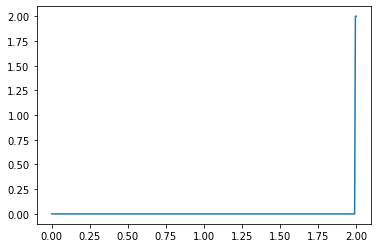

In [4]:
v0 = vec(u0_vec.len())
v0[1]=0.0;
v0[v0.len()]=2.0;
v0
u0.vec_import(v0);
Draw(u0,mesh,0)

We now define the source term create some boundary condition with the mesh function previously generated:

In [28]:
f = MeshFunction(mesh,1)
f.pushFunction(lambda p: [0])
f_vec = f.vec_export()

In [31]:
bc = BoundaryCondition("DIRICHLET",f)
bc.apply(v0);

Last we define the finite difference scheme on the given mesh, and solve the problem:
$$A\vec{u} = \vec{f}$$

using Gauss-Seidel method.

In [6]:
FD = FiniteDifference(mesh)

In [34]:
M = FD.LaplaceOp(bc);

In [24]:
u_vec = GauBSeidel(M,v0,v0,15000)
u = MeshFunction(mesh,1)
u.pushFunction(lambda p: [0])
u.vec_import(u_vec)

In [22]:
u_vec
u.eval([0.3],0)

[0.24394174277938147]

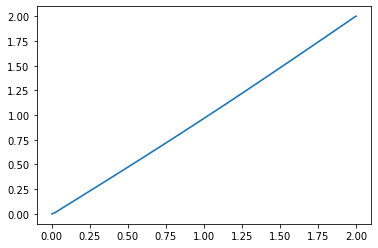

In [32]:
Draw(u,mesh,0)